In [20]:
import numpy as np
from sklearn.decomposition import PCA

In [21]:
# Define the Oja class
class Oja:
    def __init__(self, minimized_data_size=1, step=0.01, weight_init=None):
        """
        Constructor method for the Oja class.
        Initializes the Oja object with default values for minimized_data_size and step.
        """
        self.minimized_data_size = minimized_data_size
        self.step = step
        self.weight = None

        if weight_init is None:
            self.weight_init = "random"
        else:
            self.weight_init = weight_init

    def initialize_weights(self, shape):
        """
        Initialize the weight matrix based on the chosen method.
        """
        if self.weight_init == "random":
            return np.random.randn(*shape)
        elif self.weight_init == "zeros":
            return np.zeros(shape)
        elif self.weight_init == "ones":
            return np.ones(shape)
        else:
            raise ValueError("Invalid weight initialization method.")

    def train(self, X, epochs=100):
        """
        Train the Oja's rule algorithm on the given input data for a specified number of epochs.
        Initializes the weight matrix, formats the input data, and performs training updates.
        """
        X = self._format_data(X)
        n_input_features = X.shape[1]
        self.weight = self.initialize_weights((n_input_features, self.minimized_data_size))

        for _ in range(epochs):
            mae = self.one_training_update(X)
            print(mae)

    def reconstruct(self, X):
        """
        Reconstruct the original data from the minimized data using the weight matrix.
        """
        X = self._format_data(X)  # Format the input data
        return np.dot(X, self.weight.T)  # Return the reconstructed data

    def predict(self, X):
        """
        Compute the minimized data by multiplying the input data with the weight matrix.
        """
        X = self._format_data(X)  # Format the input data
        return np.dot(X, self.weight)  # Return the minimized data

    def _format_data(self, X):
        """
        Helper method to format the input data into a 2-dimensional numpy array if it is 1-dimensional.
        """
        X = np.asarray(X)  # Convert the input to a numpy array
        if X.ndim == 1:  # Check if the input is 1-dimensional
            X = X.reshape(-1, 1)  # Reshape the array to be 2-dimensional
        return X  # Return the formatted data
    def one_training_update(self, X):
        #minimised correspond to y in typical neural network terminology
        #normally is given by x^T*w
        #in this case it's defined by x*w
        #print(X.shape)
        #print(self.weight.shape)
        #this is y
        minimized = np.dot(X, self.weight)
        #this should be y*w
        reconstruct = np.dot(minimized, self.weight.T)
        #this should be x-y*w
        error = X - reconstruct
        #this should be learning*(x-y*w)^{T} y 
        self.weight += self.step * np.dot(error.T, minimized)
        mae = np.sum(np.abs(error)) / X.size

        return mae

In [22]:
data = np.array([[2, 2], [1, 1], [4, 4], [5, 5]])

In [23]:
ojanet = Oja(minimized_data_size=1, step=0.01)
ojanet.train(data, epochs=100)

minimized = ojanet.predict(data)
reconstructed = ojanet.reconstruct(minimized)

print("Minimized data:")
print(minimized)
print("Reconstructed data:")
print(reconstructed)

4.163507368344624
0.5900251183791857
0.3610033416130638
0.3419813946193039
0.24476878685239742
0.22406943809983698
0.17053174346951605
0.1524119271470732
0.11999948457665846
0.10540629936852217
0.08475136096273078
0.07351283461514857
0.059923569593003795
0.05150484667275873
0.04237263141987671
0.03618050541797546
0.029953620085522603
0.025455672481212138
0.021166598910293766
0.017927437095801108
0.0149520599377585
0.012633460409957997
0.010559056165966418
0.008906423166455624
0.0074550567852146865
0.006280616124661187
0.005262629684369968
0.004429767901717063
0.0037144977768414633
0.003124743042622391
0.0026215474433819996
0.0022043743337205324
0.0018500640439882976
0.0015551868119174084
0.0013055555259589569
0.0010972309547265524
0.0009212751408371189
0.0007741521500668758
0.0006500892704372485
0.0005462149317686515
0.00045872171359090386
0.00038539592330061323
0.0003236833770473013
0.000271928733661414
0.00022839564372179044
0.00019186961651096457
0.00016115828442531122
0.00013538156

In [24]:
pca = PCA(n_components=1)
transformed_data_sklearn = pca.fit_transform(data)
principal_components_sklearn = pca.components_

print("Transformed data (scikit-learn):")
print(transformed_data_sklearn)
print("Principal components (scikit-learn):")
print(principal_components_sklearn)

Transformed data (scikit-learn):
[[ 1.41421356]
 [ 2.82842712]
 [-1.41421356]
 [-2.82842712]]
Principal components (scikit-learn):
[[-0.70710678 -0.70710678]]


In [28]:
testi=np.array([[ 1.76,  0.4 ,  0.98,  2.24,  1.87],
       [-0.98,  0.95, -0.15, -0.1 ,  0.41],
       [ 0.14,  1.45,  0.76,  0.12,  0.44],
       [ 0.33,  1.49, -0.21,  0.31, -0.85],
       [-2.55,  0.65,  0.86, -0.74,  2.27],
       [-1.45,  0.05, -0.19,  1.53,  1.47],
       [ 0.15,  0.38, -0.89, -1.98, -0.35],
       [ 0.16,  1.23,  1.2 , -0.39, -0.3 ],
       [-1.05, -1.42, -1.71,  1.95, -0.51],
       [-0.44, -1.25,  0.78, -1.61, -0.21],
       [-0.9 ,  0.39, -0.51, -1.18, -0.03],
       [ 0.43,  0.07,  0.3 , -0.63, -0.36],
       [-0.67, -0.36, -0.81, -1.73,  0.18],
       [-0.4 , -1.63,  0.46, -0.91,  0.05],
       [ 0.73,  0.13,  1.14, -1.23,  0.4 ],
       [-0.68, -0.87, -0.58, -0.31,  0.06],
       [-1.17,  0.9 ,  0.47, -1.54,  1.49],
       [ 1.9 ,  1.18, -0.18, -1.07,  1.05],
       [-0.4 ,  1.22,  0.21,  0.98,  0.36],
       [ 0.71,  0.01,  1.79,  0.13,  0.4 ],
       [ 1.88, -1.35, -1.27,  0.97, -1.17],
       [ 1.94, -0.41, -0.75,  1.92,  1.48],
       [ 1.87,  0.91, -0.86,  1.91, -0.27],
       [ 0.8 ,  0.95, -0.16,  0.61,  0.92],
       [ 0.38, -1.1 ,  0.3 ,  1.33, -0.69],
       [-0.15, -0.44,  1.85,  0.67,  0.41],
       [-0.77,  0.54, -0.67,  0.03, -0.64],
       [ 0.68,  0.58, -0.21,  0.4 , -1.09],
       [-1.49,  0.44,  0.17,  0.64,  2.38],
       [ 0.94, -0.91,  1.12, -1.32, -0.46],
       [-0.07,  1.71, -0.74, -0.83, -0.1 ],
       [-0.66,  1.13, -1.08, -1.15, -0.44],
       [-0.5 ,  1.93,  0.95,  0.09, -1.23],
       [ 0.84, -1.  , -1.54,  1.19,  0.32],
       [ 0.92,  0.32,  0.86, -0.65, -1.03],
       [ 0.68, -0.8 , -0.69, -0.46,  0.02],
       [-0.35, -1.37, -0.64, -2.22,  0.63],
       [-1.6 , -1.1 ,  0.05, -0.74,  1.54],
       [-1.29,  0.27, -0.04, -1.17,  0.52],
       [-0.17,  0.77,  0.82,  2.16,  1.34],
       [-0.37, -0.24,  1.1 ,  0.66,  0.64],
       [-1.62, -0.02, -0.74,  0.28, -0.1 ],
       [ 0.91,  0.32,  0.79, -0.47, -0.94],
       [-0.41, -0.02,  0.38,  2.26, -0.04],
       [-0.96, -0.35, -0.46,  0.48, -1.54],
       [ 0.06,  0.16,  0.23, -0.6 , -0.24],
       [-1.42, -0.49, -0.54,  0.42, -1.16],
       [ 0.78,  1.49, -2.07,  0.43,  0.68],
       [-0.64, -0.4 , -0.13, -0.3 , -0.31],
       [-1.68,  1.15,  1.08, -0.81, -1.47],
       [ 0.52, -0.58,  0.14, -0.32,  0.69],
       [ 0.69, -0.73, -1.38, -1.58,  0.61],
       [-1.19, -0.51, -0.6 , -0.05, -1.94],
       [ 0.19,  0.52,  0.09, -0.31,  0.1 ],
       [ 0.4 , -2.77,  1.96,  0.39, -0.65],
       [-0.39,  0.49, -0.12, -2.03,  2.06],
       [-0.11,  1.02, -0.69,  1.54,  0.29],
       [ 0.61, -1.05,  1.21,  0.69,  1.3 ],
       [-0.63, -0.48,  2.3 , -1.06, -0.14],
       [ 1.14,  0.1 ,  0.58, -0.4 ,  0.37],
       [-1.31,  1.66, -0.12, -0.68,  0.67],
       [-0.46, -1.33, -1.35,  0.69, -0.16],
       [-0.13,  1.08, -1.13, -0.73, -0.38],
       [ 0.09, -0.04, -0.29, -0.06, -0.11],
       [-0.72, -0.81,  0.27, -0.89, -1.16],
       [-0.31, -0.16,  2.26, -0.7 ,  0.94],
       [ 0.75, -1.19,  0.77, -1.18, -2.66],
       [ 0.61, -1.76,  0.45, -0.68,  1.66],
       [ 1.07, -0.45, -0.69, -1.21, -0.44],
       [-0.28, -0.36,  0.16,  0.58,  0.35],
       [-0.76, -1.44,  1.36, -0.69, -0.65],
       [-0.52, -1.84, -0.48, -0.48,  0.62],
       [ 0.7 ,  0.  ,  0.93,  0.34, -0.02],
       [ 0.16, -0.19, -0.39, -0.27, -1.13],
       [ 0.28, -0.99,  0.84, -0.25,  0.05],
       [ 0.49,  0.64, -1.57, -0.21,  0.88],
       [-1.7 ,  0.39, -2.26, -1.02,  0.04],
       [-1.66, -0.99, -1.47,  1.65,  0.16],
       [ 0.57, -0.22, -0.35, -1.62, -0.29],
       [-0.76,  0.86,  1.14,  1.47,  0.85],
       [-0.6 , -1.12,  0.77,  0.36, -1.77],
       [ 0.36,  0.81,  0.06, -0.19, -0.81],
       [-1.45,  0.8 , -0.31, -0.23,  1.73],
       [ 0.68,  0.37,  0.14,  1.52,  1.72],
       [ 0.93,  0.58, -2.09,  0.12, -0.13],
       [ 0.09,  0.94, -2.74, -0.57,  0.27],
       [-0.47, -1.42,  0.87,  0.28, -0.97],
       [ 0.31,  0.82,  0.01,  0.8 ,  0.08],
       [-0.4 , -1.16, -0.09,  0.19,  0.88],
       [-0.12,  0.46, -0.96, -0.78, -0.11],
       [-1.05,  0.82,  0.46,  0.28,  0.34],
       [ 2.02, -0.47, -2.2 ,  0.2 , -0.05],
       [-0.52, -0.98, -0.44,  0.18, -0.5 ],
       [ 2.41, -0.96, -0.79, -2.29,  0.25],
       [-2.02, -0.54, -0.28, -0.71,  1.74],
       [ 0.99,  1.32, -0.88,  1.13,  0.5 ],
       [ 0.77,  1.03, -0.91, -0.42,  0.86],
       [-2.66,  1.51,  0.55, -0.05,  0.22],
       [-1.03, -0.35,  1.1 ,  1.3 ,  2.7 ],
       [-0.07, -0.66, -0.51, -1.02, -0.08]])

In [29]:
ojanet = Oja(minimized_data_size=2, step=0.0001)
ojanet.train(testi, epochs=100)

minimized = ojanet.predict(testi)
reconstructed = ojanet.reconstruct(minimized)

print("Minimized data:")
print(minimized)
print("Reconstructed data:")
print(reconstructed)

1.445107898345016
1.3574785258163011
1.2836981656657904
1.2214039112491264
1.167437262199192
1.120209639765394
1.0787749969994103
1.0420682575155416
1.00914849621191
0.9794261612042969
0.9524327424151502
0.928369868635526
0.9068448654285381
0.8871473598790578
0.8691787070901476
0.8528535933020425
0.8377041824756796
0.8236860363986926
0.8106125876582368
0.7983740838023399
0.7869160550386816
0.7762866033342221
0.7665349214906217
0.7573789707744449
0.7489632963973375
0.7412579986474501
0.7339909392276475
0.7270970131915819
0.7205549338609678
0.7144240640791385
0.7086826330868392
0.7032791576152041
0.6982220344826883
0.6934996657341943
0.688997765301636
0.6846908646917553
0.6806279119429187
0.6767971770078737
0.673197973473982
0.669773516333096
0.6665240789253725
0.6634802443520873
0.660622439728467
0.6579017346331707
0.6552815566632139
0.6527679571996007
0.6503669575074076
0.6480748962499638
0.6458622705916032
0.6438857163907502
0.6420570301037826
0.6403144892074981
0.6386388726614
0.6370

In [32]:
import pandas as pd
import seaborn as sns
oja_min=pd.DataFrame(minimized, columns=["X1","X2"])

In [33]:
oja_min

,X1,X2
0,1.379807,-1.103390
1,-0.507815,-0.713990
2,-0.482179,-1.285687
3,-1.593101,-0.959294
4,1.147838,-1.056026
...,...,...
95,-1.081708,-0.468446
96,-1.047926,0.492350
97,-0.433218,-2.080529
98,2.514842,-1.050523


<Axes: xlabel='X1', ylabel='X2'>

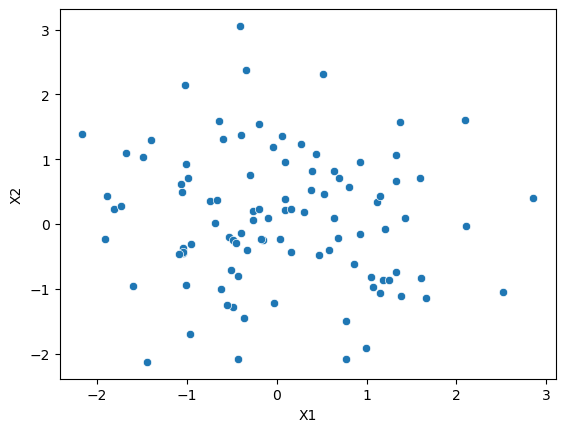

In [34]:
sns.scatterplot(data=oja_min,x="X1",y="X2")

In [25]:
pca = PCA(n_components=2)
transformed_data_sklearn = pca.fit_transform(testi)
principal_components_sklearn = pca.components_

print("Transformed data (scikit-learn):")
print(transformed_data_sklearn)
print("Principal components (scikit-learn):")
print(principal_components_sklearn)

Transformed data (scikit-learn):
[[-2.31820124e+00  1.41482703e+00]
 [-7.63227897e-01 -4.84893634e-01]
 [-9.29767280e-01 -8.95522575e-02]
 [-1.73922383e-01  8.62134211e-01]
 [-1.80187867e+00 -2.70600742e+00]
 [-2.16516602e+00 -4.05836920e-01]
 [ 1.45082594e+00  3.27214023e-02]
 [-9.95370371e-02 -4.48215933e-01]
 [-4.16993310e-01  1.02129747e+00]
 [ 1.54535578e+00 -1.40066394e+00]
 [ 4.66131653e-01 -6.47032195e-01]
 [ 7.07614771e-01  3.71796197e-02]
 [ 1.08094141e+00 -6.46409399e-01]
 [ 1.13888067e+00 -9.96091020e-01]
 [ 6.15330270e-01 -5.72634550e-01]
 [ 4.46400056e-01 -2.72065173e-01]
 [-5.70061806e-01 -1.69566430e+00]
 [ 6.69194705e-02  1.09083861e+00]
 [-1.41863708e+00  1.72184969e-01]
 [-2.50770007e-01 -4.42001805e-01]
 [ 1.24202534e+00  2.52404575e+00]
 [-1.36739604e+00  2.37063620e+00]
 [-8.72856643e-01  2.78254174e+00]
 [-1.08988988e+00  9.63544682e-01]
 [ 1.40855232e-01  6.80603458e-01]
 [-6.22192360e-01 -9.16612356e-01]
 [ 4.56227287e-02  1.12534132e-01]
 [ 3.78007874e-01  1.0

In [35]:
pca_min=pd.DataFrame(transformed_data_sklearn, columns=["X1","X2"])

<Axes: xlabel='X1', ylabel='X2'>

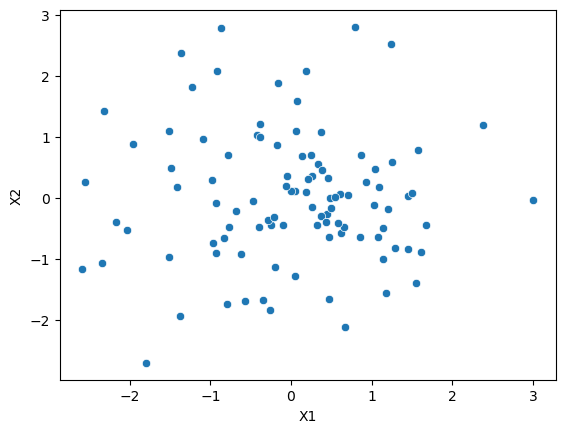

In [36]:
sns.scatterplot(data=pca_min,x="X1",y="X2")